# Keras for basic regression
Revisiting the task of regression, let's look at trying to model a more complicated function; a sine wave with some Gaussian noise. We'll also look at an alternative way of building models in Keras.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
n = 200
x = 2*np.pi*np.random.random(n)
y = np.sin(x)+np.random.normal(scale=0.2, size=n)
d = np.array(list(zip(x,y)))
np.random.shuffle(d)
x,y = d[:,0],d[:,1]

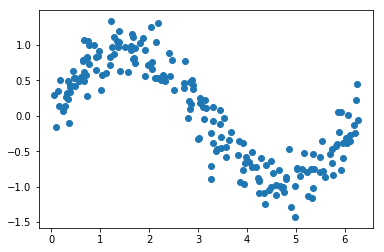

In [3]:
plt.scatter(x, y)

Previously we used a class-based approach to building our Keras model, where we added layers one after another. Here we'll use an alternative, *functional*, approach. This involves taking a dummy tensor and applying transformations to it. The `Model` is the created by passing the original tensor and the final tensor as arguments. The history of the tensor transformations is automatically saved, and the mode will reapply them to any tensors which it is passed in the future.

This method can either be more intuitive (if you view NNs as a mathematical map from input to output), or more complicated (if you instead see NNs as statistical models). In either case, it offers great flexibility than the pure class-based approach, as we'll see later.

Applying transformations to the dummy tensor agin takes the form of instantiating Dense layers and activation functions, however rather than appending these to a model, they instead act on the dummy tensor.

In [4]:
inputs = Input(shape=(1,))  # This is our dummy tensor
h = Dense(10, activation='relu', kernel_initializer='he_normal')(inputs)  # The Dense layer is applied to the dummy tensor 
for _ in range(5): h = Dense(10, activation='relu', kernel_initializer='he_normal')(h)  # This can also be done in loops
outputs = Dense(1, activation='linear')(h)  # Final transformation with linear output
model = Model(inputs=inputs, outputs=outputs)  # Model class then instantiated based on initial and final tensor

model.compile(optimizer=Adam(lr=0.01), loss='mse')  # Compile as before (MSE=Mean Squared Error)

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
__________

As before, model summary shows the layers in the NN, despite not ever explicitly appending them to the model

In [6]:
history = model.fit(x=x, y=y, batch_size=64, epochs=100)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6653
Epoch 2/100
200/200 [==============================] - 0s 31us/step - loss: 0.4968
Epoch 3/100
200/200 [==============================] - 0s 30us/step - loss: 0.4007
Epoch 4/100
200/200 [==============================] - 0s 26us/step - loss: 0.3148
Epoch 5/100
200/200 [==============================] - 0s 29us/step - loss: 0.2215
Epoch 6/100
200/200 [==============================] - 0s 30us/step - loss: 0.2202
Epoch 7/100
200/200 [==============================] - 0s 26us/step - loss: 0.3461
Epoch 8/100
200/200 [==============================] - 0s 31us/step - loss: 0.2702
Epoch 9/100
200/200 [==============================] - 0s 27us/step - loss: 0.2158
Epoch 10/100
200/200 [==============================] - 0s 26us/step - loss: 0.1717
Epoch 11/100
200/200 [==============================] - 0s 27us/step - loss: 0.1809
Epoch 12/100
200/200 [==============================] - 0s 26us/step - loss: 0.1460
Ep

200/200 [==============================] - 0s 26us/step - loss: 0.0633
Epoch 99/100
200/200 [==============================] - 0s 26us/step - loss: 0.0641
Epoch 100/100
200/200 [==============================] - 0s 27us/step - loss: 0.0598


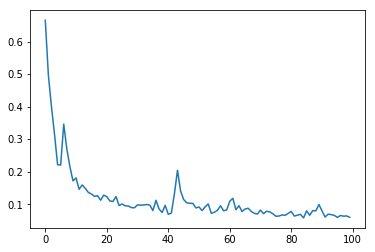

In [7]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])

In [8]:
preds = model.predict(x)

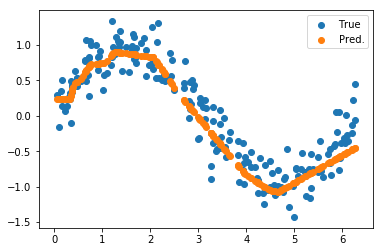

In [9]:
_ = plt.scatter(x, y, label='True')
_ = plt.scatter(x, preds.squeeze(), label='Pred.')
plt.legend();